En el laboratorio anterior vimos como manualmente probando diferentes valores de "w" y "b" podríamos encontrar una recta que modele bien una realidad

Sin embargo no es necesario que realicemos una implementación desde cero del algoritmo, podemos usar un framework que lo implemente, como Tensorflow

Tensorflow tiene muchos algoritmos implementados, y funciona sobre entornos de Big Data, el problema es que tiene una sintaxis compleja

Usemos entonces un frameowork fachada que simplifique la programación: Keras

La ventaja de Keras es que el código que implementamos puede ser traducido a diferentes motores de Machine Learning, en este ejemplo haremos la traducción a Tensorflow

# Librerias

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
#Importamos el objeto "Sequential", que nos permitirá agregarle una serie de configuraciones a nuestro modelo
from keras.models import Sequential

#El objeto Dense nos permite definir una configuración del modelo
from keras.layers import Dense

#Importamos los optimizadores, son los objetos que nos ayudan a buscar los mejores valores para el modelo ("w", y "b")
from tensorflow.keras.optimizers import Adam, SGD

# Conexión a repositorio de datos

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lectura de datos

In [27]:
#Leemos los datos de las estaruras de las personas según sus pesos
df = pd.read_csv('/content/drive/MyDrive/Data/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Definición del modelo

In [28]:
#Instaciamos un modelo de machine learning vacío con "Sequential"
model = Sequential()

In [29]:
#Agregamos una configuración con "Dense"
#Con el primer parámetro definimos el número de outputs que tiene nuestro modelo (1, el Weight)
#Con "input_shape" definimos el número de inputs que entra al modelo (1, el Height)
model.add(Dense(1, input_shape=(1,)))

In [30]:
#Vemos un resumen del modelo
#En la columna "layer" vemos la configuración, por ahora sólo 1
#En la columna "output" vemos cuántos salidas tiene el modelo, sólo 1 (el weight)
#En la columna "Param #" vemos la cantidad de parámetros de entrada y salida (2, 1 de entrada [Height] y 1 de salida [Weight])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Compilación del modelo

In [31]:
#Compilamos el modelo con Keras
#Recordemos que "Keras" nos da la sintaxis de alto nivel
#La compilación se hará a algún motor de Machine Learning, en este caso a Tensorflow
#La ventaja de codificar nuestros modelos con Keras es que nos abstraemos de la tecnología que los ejecuta por detrás
#De hecho gracias a esto podemos integrar fácilmente nuestros modelos de Machine Learning a entornos de Big Data y Cloud
#Por ahora ignoraremos el primer parámetro
#En el segundo parámetro colocamos el tipo de error que queremos usar para nuestros cálculos, usaremos el error cuadrático
model.compile(Adam(lr=0.8), 'mean_squared_error')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Entrenamiento del modelo

In [32]:
#Con el modelo compilado, usaremos el modelo para entrenar nuestra solución

#Obtenemos los valores X
x = df['Height'].values

#Obtenemos los valores Y
y_real = df['Weight'].values

In [16]:
#Entrenamos el modelo para que encuentre la mejor recta
#Definiremos 40 iteraciones (epochs=40)
#Notemos como en cada iteración el error (loss) disminuye
model.fit(x, y_real, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 1ms/step - loss: 1287.0601
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 561.6902
Epoch 3/40
313/313 [==============================] - 0s 1ms/step - loss: 533.4579
Epoch 4/40
313/313 [==============================] - 0s 1ms/step - loss: 494.2726
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 465.3591
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 410.1791
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 388.6223
Epoch 8/40
313/313 [==============================] - 0s 1ms/step - loss: 363.8864
Epoch 9/40
313/313 [==============================] - 0s 1ms/step - loss: 314.7358
Epoch 10/40
313/313 [==============================] - 0s 1ms/step - loss: 277.3217
Epoch 11/40
313/313 [==============================] - 0s 1ms/step - loss: 286.0679
Epoch 12/40
313/313 [==============================] - 0s 1ms/step - loss: 246.9991


# Uso del modelo

In [17]:
#Ahora que tenemos el modelo entrenado, vamos a usarlo para predecir los Y
y_prediccion = model.predict(x)
y_prediccion

array([[221.78735],
       [182.75323],
       [223.81482],
       ...,
       [144.88431],
       [184.69781],
       [130.05899]], dtype=float32)

# Gráfico del modelo solución

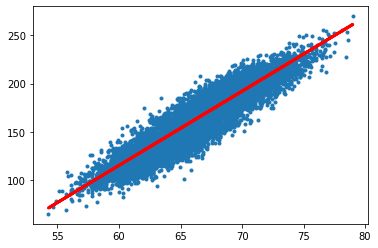

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

#Dibujamos el gráfico de los puntos reales
plt.plot(x, y_real, '.')

#Dibujamos la recta obtenida por el modelo
plt.plot(x, y_prediccion, color='red', linewidth=3)

In [19]:
#Obtenemos los valores de "w" y "b" que el modelo encontró
w, b = model.get_weights()

In [20]:
#Vemos el valor de "w"
w

array([[7.7064686]], dtype=float32)

In [21]:
#Vemos el valor de "b"
b

array([-347.31238], dtype=float32)

In [22]:
#Utilizaremos una métrica llamada r2, que nos da los porcentajes de precisión
from sklearn.metrics import r2_score

In [23]:
#Esto representa el porcentaje de patrones encontrados
r2_score(y_real, y_prediccion)

0.8480651294185608